In [1]:
%pwd

'/Users/alexkim/Documents/GitHub/sales_data_analysis'

# 인사이트(중앙 편의점)
1. 소비 트랜드 만들기 
    - 1 지역 젊은 여상들의 고가품 소비 증가 경향
    - 5 지역 고령 남성들의 저가품 소비 증가 경향
    - 인당 평균 소비량 감소
    - 
       |지역|소득|컨셉|연령분포|소득시간|
       |-|-|-|-|-|
       | 1지역 | 2억 | 부촌 |고령남여+ 젊은여|일과시간 소비|
       | 2지역 | 1억 | 위성신도시 |신혼 부부 + 어린 자녀|오전,주말에 증가| 
       | 3지역 | 5천 | 업무지구 |30~50대 생상가능인구|점심시간,저녁, 주말 전무| 
       | 4지역 | 1천 | 대학가 |20대|점심시간, 저녁, 주말 전무|
       | 5지역 | 3천 | 일반거주지구 |노년층|밤 늦게|
      - 소득은 정규분포로 데이터 입력
1. 트랜드 분석
    - 평균 1회 결제 금액이 큰 고객을 더 유치하기위한 마케팅 계획 수립을 위한 분석
    - 최근 변화한 소비 트렌드에 가장 민감하게 반응한 소득별 계층 분석
    - 
4. 추가할 컬럼
    고객
        - *고객 번호, *성별, *지역, 등급, *나이, 20년 총 소비금액, 21년 총 소비금액, *소득, 거래당 평균 결제 금액, 연간 방문 횟수
    상품
        - *상품 코드, *가격, 고가 중가 저가 여부
    거래
        - 거래 번호, *고객 변호, *상품코드, *수량, *날짜
        
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(0)

In [3]:
# from matplotlib import font_manager, rc
# font_path = 'dataset/malgun.ttf'
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family='AppleGothic')
# #rc('font',family=font_name)
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력

## 고객 데이터프레임 만들기 : customer

### 고객 데이터프레임 양식 만들기

In [4]:
customer = pd.DataFrame(columns=['cusno', 'region', 'gender', 'age',  'income', 'grade_20',
                        'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'])
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend


### 고객 데이터프레임 데이터 채우기

#### 고객 번호 : cusno

In [5]:
cusno = np.arange(10000, 11000)
customer.cusno = cusno

#### 거주 지역 : region

In [6]:
area_1 = np.random.randint(1, 2, size=100).tolist()
area_2 = np.random.randint(2, 3, size=150).tolist()
area_3 = np.random.randint(3, 4, size=300).tolist()
area_4 = np.random.randint(4, 5, size=200).tolist()
area_5 = np.random.randint(5, 6, size=250).tolist()
li = area_1+area_2+area_3+area_4+area_5
random.shuffle(li)

customer.region = li

#### 소득 : income

##### 지역별 소득 분포 산정 : 각각 특성에 맞는 정규분포 사용

In [7]:
customer.income[customer.region == 1] = np.random.normal(10, 3, 100)*20000
customer.income[customer.region == 2] = np.random.normal(10, 2, 150)*10000
customer.income[customer.region == 3] = np.random.normal(10, 1, 300)*5000
customer.income[customer.region == 4] = np.random.normal(10, 2, 200)*1000
customer.income[customer.region == 5] = np.random.normal(10, 0.5, 250)*3000
customer.income = customer.income.map(lambda x: int(x))

##### 소득 컬럼의 통계 요약

In [8]:
customer.describe()

,cusno,region,income
count,1000.000000,1000.000000,1000.000000
mean,10499.500000,3.350000,59457.058000
std,288.819436,1.276373,58640.130695
min,10000.000000,1.000000,4823.000000
25%,10249.750000,2.750000,28977.500000
50%,10499.500000,3.000000,44777.000000
75%,10749.250000,4.250000,61426.250000
max,10999.000000,5.000000,356663.000000


##### 지역별 소득 값 중 이상치 보정

<AxesSubplot:xlabel='region', ylabel='income'>

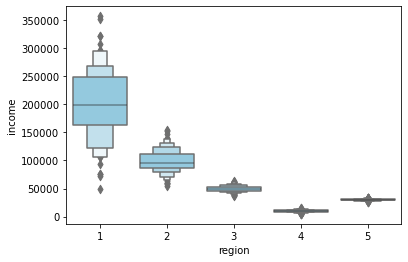

In [9]:
# 지역에 따른 소득 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='income', data=customer, color='skyblue')

In [10]:
# 고객 소득 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    Q1 = cus_info["income"]["25%"]
    Q3 = cus_info["income"]["75%"]
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].income <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].income >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].income
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 2개
# 2지역: 0개
# 3지역: 2개
# 4지역: 4개
# 5지역: 2개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: income, dtype: int64)
2지역 이상치
216    154754
345    151644
Name: income, dtype: int64
3지역 이상치
Series([], Name: income, dtype: int64)
4지역 이상치
489    16230
Name: income, dtype: int64
5지역 이상치
400    33643
653    34031
Name: income, dtype: int64


#### 연령 : age

##### 지역별 연령 데이터 산정

In [11]:
# 1 지역 연령 데이터 생성
age_1_old = np.random.normal(65, 6, 60).tolist()
age_1_young = np.random.normal(24, 3, 40).tolist()
age_1 = age_1_old + age_1_young
customer.age[customer.region == 1] = age_1

# 2 지역 연령 데이터 생성
age_2_old = np.random.normal(40, 3, 100).tolist()
age_2_young = np.random.normal(5, 3, 50).tolist()
age_2 = age_2_old + age_2_young
customer.age[customer.region == 2] = age_2

# # 3 지역 연령 데이터 생성
age_3 = np.random.randint(23, 57, size=300).tolist()
customer.age[customer.region == 3] = age_3

# # 4 지역 연령 데이터 생성
age_4 = np.random.randint(20, 28, size=200).tolist()
customer.age[customer.region == 4] = age_4

# # 5 지역 연령 데이터 생성
age_5 = np.random.randint(50, 85, size=250).tolist()
customer.age[customer.region == 5] = age_5

customer.age = customer.age.map(lambda x: int(x))
customer.age.value_counts().sort_index()

-1     1
 0     2
 1     3
 2     8
 3     6
      ..
 80    6
 81    6
 82    8
 83    5
 84    4
Name: age, Length: 79, dtype: int64

##### 지역별 연령 중 이상치 보정

<AxesSubplot:xlabel='region', ylabel='age'>

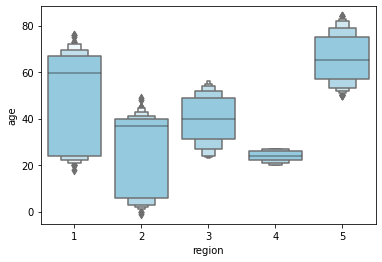

In [12]:
# 지역에 따른 연령 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='age', data=customer, color='skyblue')

In [13]:
# 고객 연령 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    Q1 = cus_info["age"]["25%"]
    Q3 = cus_info["age"]["75%"]
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].age <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].age >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].age
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 0개
# 2지역: 0개
# 3지역: 0개
# 4지역: 0개
# 5지역: 0개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: age, dtype: int64)
2지역 이상치
Series([], Name: age, dtype: int64)
3지역 이상치
Series([], Name: age, dtype: int64)
4지역 이상치
Series([], Name: age, dtype: int64)
5지역 이상치
Series([], Name: age, dtype: int64)


In [14]:
# 추가 이상치 검증 : 나이가 음수인 이상치를 절대값을 이용하여 유효한 값으로 보정
customer[customer.age <= 0] = abs(customer[customer.age <= 0])
customer.age.value_counts().sort_index()

0     2
1     4
2     8
3     6
4     6
     ..
80    6
81    6
82    8
83    5
84    4
Name: age, Length: 78, dtype: int64

#### 성별 : gender

##### 지역별 성별 데이터 산정

In [15]:
# 1 지역 성별 데이터 생성
gender_1_male = np.random.randint(0, 1, size=40).tolist()
gender_1_female = np.random.randint(1, 2, size=60).tolist()
gender_1 = gender_1_male + gender_1_female
random.shuffle(gender_1)
customer.gender[customer.region == 1] = gender_1

# 2 지역 성별 데이터 생성
gender_2 = np.random.randint(0, 2, size=150)
customer.gender[customer.region == 2] = gender_2

# 3 지역 성별 데이터 생성
gender_3 = np.random.randint(0, 2, size=300)
customer.gender[customer.region == 3] = gender_3

# 4 지역 성별 데이터 생성
gender_4 = np.random.randint(0, 2, size=200)
customer.gender[customer.region == 4] = gender_4

# 5 지역 성별 데이터 생성
gender_5 = np.random.randint(0, 2, size=250)
customer.gender[customer.region == 5] = gender_5

customer.gender = customer.gender.map(lambda x: int(x))
customer.gender.value_counts().sort_index()

0    482
1    518
Name: gender, dtype: int64

## 상품 목록 데이터프레임 만들기 : product

### 상품 목록 데이터프레임 양식 만들기

In [16]:
product = pd.DataFrame(columns=['product_num', 'price', 'price_grade'])
product

,product_num,price,price_grade


### 상품 목록 데이터프레임 데이터 채우기

#### 상품 코드 : product_num

In [17]:
product_num = np.arange(1, 101)
product.product_num = product_num

#### 가격 : price

In [18]:
price = random.sample(list(range(1000, 100000)), 100)
product.price = price

## 거래 데이터 만들기 : purchase

### 거래 데이터프레임 만들기

#### 거래 데이터프레임 양식 만들기

In [19]:
purchase = pd.DataFrame(columns=['ts_num', 'ts_cusno', 'ts_product_num', 'quantity','amount', 'date', 'year', 'day', 'time'])
purchase

,ts_num,ts_cusno,ts_product_num,quantity,amount,date,year,day,time


#### 거래 데이터프레임 데이터 채우기

##### 날짜,요일,시간 : date, day, time

In [20]:
from datetime import datetime
# date
date_list_20 = list(pd.date_range('2020-01-01', '2020-12-31', freq='H'))
date_list_21 = list(pd.date_range('2021-01-01', '2021-12-31', freq='H'))
date_20 = np.random.choice(date_list_20, size=6000).tolist()
date_21 = np.random.choice(date_list_21, size=4000).tolist()
date = date_20 + date_21
random.shuffle(date)
date = pd.Series(date)

# date 중에서 년월일만 추출
purchase.date = date.map(lambda x:datetime.strptime(datetime.strftime(x, '%Y-%m-%d'), '%Y-%m-%d'))

# year(년도)
purchase.year = purchase.date.dt.year

# day(요일)
purchase.day = purchase.date.dt.weekday

# 시간
time = date.map(lambda x: x.hour)
purchase.time = time

# purchase.head()
# purchase=purchase.set_index('date')
purchase=purchase.sort_values('date',ascending=True)
purchase.head()

,ts_num,ts_cusno,ts_product_num,quantity,amount,date,year,day,time
5862,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,20
7039,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,19
2372,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,20
8956,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,17
3747,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,8


##### 거래 번호 : ts_num

In [21]:
ts_num = np.arange(0, 10000)
purchase.ts_num = ts_num

##### 고객번호 : ts_cusno

In [22]:
# 기존 cusno가 중복될 수 있도록 만들기
ts_cusno = np.random.choice(list(cusno), size=10000)
purchase.ts_cusno = ts_cusno

##### 상품코드 : ts_product_num

In [23]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 20000:
        y = 3
    elif x <= 50000:
        y = 2
    else:
        y = 1
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,product_num,price,price_grade
0,1,65694,1
1,2,61360,1
2,3,58685,1
3,4,16482,3
4,5,12221,3
...,...,...,...
95,96,3031,3
96,97,73498,1
97,98,67171,1
98,99,43976,2


In [24]:
ts_product_num = np.random.choice(list(product_num), size=10000)
purchase.ts_product_num = ts_product_num

price_grade_1 = product[product['price_grade']== 1].product_num.tolist()
price_grade_2 = product[product['price_grade']== 2].product_num.tolist()
price_grade_3 = product[product['price_grade']== 3].product_num.tolist()
price_grade_3

price_grade_1_20 = np.random.choice(price_grade_1, 1000).tolist()
price_grade_2_20 = np.random.choice(price_grade_2, 2000).tolist()
price_grade_3_20 = np.random.choice(price_grade_3, 3000).tolist()
ts_product_num_20 = price_grade_1_20 + price_grade_2_20 + price_grade_3_20
random.shuffle(ts_product_num_20)
purchase[purchase['year'] == 2020].ts_product_num = ts_product_num_20

price_grade_1_21 = np.random.choice(price_grade_1, 2000).tolist()
price_grade_2_21 = np.random.choice(price_grade_2, 1000).tolist()
price_grade_3_21 = np.random.choice(price_grade_3, 1000).tolist()
ts_product_num_21 = price_grade_1_21 + price_grade_2_21 + price_grade_3_21
random.shuffle(ts_product_num_21)
purchase[purchase['year'] == 2021].ts_product_num = ts_product_num_21


##### 구매수량 : quantity

In [25]:
# 2020년 구매수량 데이터 생성
a_20 = np.random.randint(1, 4, size=3500).tolist()
b_20 = np.random.randint(4, 7, size=2000).tolist()
c_20 = np.random.randint(7, 10, size=500).tolist()
li_20 = a_20+b_20+c_20
random.shuffle(li_20)


purchase.quantity[purchase.year == 2020] = li_20

## 2021년 구매수량 데이터 생성
a_21 = np.random.randint(1, 4, size=2500).tolist()
b_21 = np.random.randint(4, 7, size=1000).tolist()
c_21 = np.random.randint(7, 10, size=500).tolist()
li_21 = a_21+b_21+c_21
random.shuffle(li_21)

purchase.quantity[purchase.year == 2021] = li_21
purchase = purchase.astype({'quantity':'int'})

In [26]:
purchase.quantity[purchase.year == 2020]

5862    4
7039    6
2372    6
8956    2
3747    2
       ..
4851    3
7084    3
6435    2
9758    1
1200    2
Name: quantity, Length: 6000, dtype: int64

## 종속변수 데이터 생성

### 상품 목록 데이터프레임 종속변수

#### 상품 가격 분류 : product_grade

In [27]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 20000:
        y = 3
    elif x <= 50000:
        y = 2
    else:
        y = 1
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,product_num,price,price_grade
0,1,65694,1
1,2,61360,1
2,3,58685,1
3,4,16482,3
4,5,12221,3
...,...,...,...
95,96,3031,3
96,97,73498,1
97,98,67171,1
98,99,43976,2


### 거래 데이터프레임 종속변수

#### 거래별 거래총액 : amount

In [51]:
def amount(x):
    a = product[product.product_num ==  x].price
    a = str(a).split()[1]
    return int(a)
    
b = purchase.ts_product_num.map(amount)
b = pd.Series(b)

purchase['amount'] = b*purchase.quantity
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5862 to 1080
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ts_num          10000 non-null  int64         
 1   ts_cusno        10000 non-null  int64         
 2   ts_product_num  10000 non-null  int64         
 3   quantity        10000 non-null  int64         
 4   amount          10000 non-null  int64         
 5   date            10000 non-null  datetime64[ns]
 6   year            10000 non-null  int64         
 7   day             10000 non-null  int64         
 8   time            10000 non-null  int64         
 9   ts_price        10000 non-null  int64         
 10  ts_grade        10000 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 937.5 KB


#### 거래별 상품가격 : ts_price

In [29]:
def price_check(x):
    a = product.loc[product.product_num ==  x,'price']
    # a = str(a).split()[1]
    return int(a)

# price_check(14)
    
b = purchase.ts_product_num.map(price_check)
b = pd.Series(b)

purchase['ts_price'] = b
purchase.head()

,ts_num,ts_cusno,ts_product_num,quantity,amount,date,year,day,time,ts_price
5862,0,10066,3,4,234740,2020-01-01,2020,2,20,58685
7039,1,10439,45,6,188280,2020-01-01,2020,2,19,31380
2372,2,10492,96,6,18186,2020-01-01,2020,2,20,3031
8956,3,10023,3,2,117370,2020-01-01,2020,2,17,58685
3747,4,10773,71,2,150024,2020-01-01,2020,2,8,75012


#### 거래별 상품 등급 : ts_grade

In [30]:
def grade_check(x):
    a = product.loc[product.product_num ==  x,'price_grade']
    # a = str(a).split()[1]
    return int(a)

# price_check(14)
    
b = purchase.ts_product_num.map(grade_check)
b = pd.Series(b)

purchase['ts_grade'] = b
purchase.head()

,ts_num,ts_cusno,ts_product_num,quantity,amount,date,year,day,time,ts_price,ts_grade
5862,0,10066,3,4,234740,2020-01-01,2020,2,20,58685,1
7039,1,10439,45,6,188280,2020-01-01,2020,2,19,31380,2
2372,2,10492,96,6,18186,2020-01-01,2020,2,20,3031,3
8956,3,10023,3,2,117370,2020-01-01,2020,2,17,58685,1
3747,4,10773,71,2,150024,2020-01-01,2020,2,8,75012,1


### 고객 데이터프레임 종속변수

#### 년도별 고객별 연간 매출액 : ASC_20, ASC_21

In [31]:
li_2020 = []
li_2021 = []
for i in range(10000,11000):
    a = purchase[(purchase['ts_cusno']== i)&(purchase["year"] == 2020)]
    b = purchase[(purchase['ts_cusno']== i)&(purchase["year"] == 2021)]
    li_2020.append(a.sum()[4])
    li_2021.append(b.sum()[4])
    
customer.ASC_20 = li_2020
customer.ASC_21 = li_2021


#### 년도별 고객 등급 : grade_20, grade_21

In [32]:
# 고객 등급 선정
bin_dividers = np.linspace(customer.ASC_20.min(), customer.ASC_20.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20'] = pd.cut(x=customer.ASC_20,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부
print(bin_dividers)
bin_dividers = np.linspace(customer.ASC_21.min(), customer.ASC_21.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21'] = pd.cut(x=customer.ASC_21,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부
print(bin_dividers)


[      0.         1535641.33333333 3071282.66666667 4606924.        ]
[      0. 1118544. 2237088. 3355632.]


#### 년도별 고객별 연간 방문 횟수 : AVC_20, AVC_21

In [33]:
li_2020 = []
li_2021 = []
for i in range(10000,11000):
    a = purchase[(purchase['ts_cusno']== i)&(purchase["year"] == 2020)]
    li_2020.append(len(a))
    a = purchase[(purchase['ts_cusno']== i)&(purchase["year"] == 2021)]
    li_2021.append(len(a))
    
customer.AVC_20 = li_2020
customer.AVC_21 = li_2021


customer.head()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,54,61526,Silver,Silver,NaN,NaN,7,4,927333.0,807373.0,NaN
1,10001,4,1,24,8709,Silver,Gold,NaN,NaN,8,7,852024.0,2123328.0,NaN
2,10002,2,0,40,94143,Silver,Gold,NaN,NaN,6,3,622055.0,1239954.0,NaN
3,10003,3,1,29,39079,Silver,Gold,NaN,NaN,6,6,1055958.0,1314407.0,NaN
4,10004,2,0,39,102429,Silver,Gold,NaN,NaN,8,6,1018692.0,1525453.0,NaN


#### 년도별 고객별 회당 평균 결제액 : ARPPU_20, ARPPU_21

In [34]:
customer.ARPPU_20 = (customer.ASC_20 / customer.AVC_20).round(2)
customer.ARPPU_21 = (customer.ASC_21 / customer.AVC_21).round(2)
customer.head()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,54,61526,Silver,Silver,132476.14,201843.25,7,4,927333.0,807373.0,NaN
1,10001,4,1,24,8709,Silver,Gold,106503.00,303332.57,8,7,852024.0,2123328.0,NaN
2,10002,2,0,40,94143,Silver,Gold,103675.83,413318.00,6,3,622055.0,1239954.0,NaN
3,10003,3,1,29,39079,Silver,Gold,175993.00,219067.83,6,6,1055958.0,1314407.0,NaN
4,10004,2,0,39,102429,Silver,Gold,127336.50,254242.17,8,6,1018692.0,1525453.0,NaN


#### 고객별 구매 추세 변화 : purchase_trend

In [35]:
# 20년 대비 21년 구매량이 늘면 1, 줄면 0
customer.purchase_trend = np.where(customer.ASC_21 > customer.ASC_20, 1,0)
customer.head()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,54,61526,Silver,Silver,132476.14,201843.25,7,4,927333.0,807373.0,0
1,10001,4,1,24,8709,Silver,Gold,106503.00,303332.57,8,7,852024.0,2123328.0,1
2,10002,2,0,40,94143,Silver,Gold,103675.83,413318.00,6,3,622055.0,1239954.0,1
3,10003,3,1,29,39079,Silver,Gold,175993.00,219067.83,6,6,1055958.0,1314407.0,1
4,10004,2,0,39,102429,Silver,Gold,127336.50,254242.17,8,6,1018692.0,1525453.0,1


## DataFrame 확인

In [36]:
customer.head()
# customer.info()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,54,61526,Silver,Silver,132476.14,201843.25,7,4,927333.0,807373.0,0
1,10001,4,1,24,8709,Silver,Gold,106503.00,303332.57,8,7,852024.0,2123328.0,1
2,10002,2,0,40,94143,Silver,Gold,103675.83,413318.00,6,3,622055.0,1239954.0,1
3,10003,3,1,29,39079,Silver,Gold,175993.00,219067.83,6,6,1055958.0,1314407.0,1
4,10004,2,0,39,102429,Silver,Gold,127336.50,254242.17,8,6,1018692.0,1525453.0,1


In [37]:
customer.purchase_trend.mean() # 29% 고객들의 매출이 늘었음, 71%의 고객들의 매출이 줄어듬.

0.323

In [38]:
table = customer.pivot_table(index=['region'],columns=['gender'],values=['AVC_20','AVC_21'],aggfunc='mean')
table

AVC_20              AVC_21          
gender         0         1         0         1
region                                        
1       5.700000  6.250000  3.900000  4.016667
2       5.631579  5.810811  4.013158  4.216216
3       5.986577  6.192053  3.771812  4.152318
4       5.813187  6.339450  3.846154  4.183486
5       5.777778  6.161290  4.039683  3.887097

<AxesSubplot:xlabel='region', ylabel='income'>

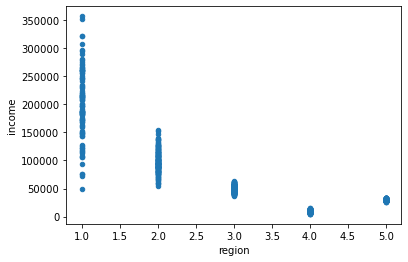

In [39]:
# 지역별 연봉 분포
customer.plot(x='region', y='income', kind='scatter')

<AxesSubplot:xlabel='region', ylabel='age'>

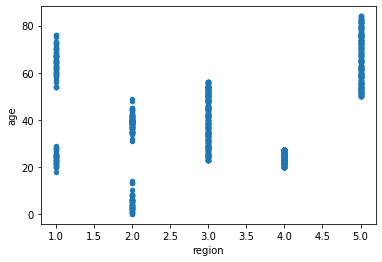

In [40]:
# 지역별 나이 분포
customer.plot(x='region', y='age', kind='scatter')

<AxesSubplot:xlabel='region'>

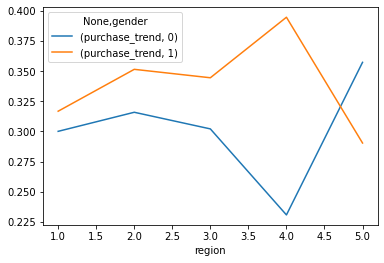

In [41]:
# 지역별 매출 증가 비율( 남/여 )
table = customer.pivot_table(index=['region'],columns=['gender'],values=['purchase_trend'],aggfunc='mean')
table.plot()

<AxesSubplot:xlabel='price_grade', ylabel='price'>

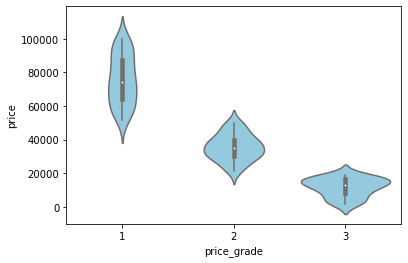

In [42]:
# 상품 등급별 가격분포
product.head()
# product.info()
x = product.price_grade
y = product.price
sns.violinplot(x,y,data=product, color='skyblue')

In [52]:
# purchase.head()
purchase

,ts_num,ts_cusno,ts_product_num,quantity,amount,date,year,day,time,ts_price,ts_grade
5862,0,10066,3,4,234740,2020-01-01,2020,2,20,58685,1
7039,1,10439,45,6,188280,2020-01-01,2020,2,19,31380,2
2372,2,10492,96,6,18186,2020-01-01,2020,2,20,3031,3
8956,3,10023,3,2,117370,2020-01-01,2020,2,17,58685,1
3747,4,10773,71,2,150024,2020-01-01,2020,2,8,75012,1
...,...,...,...,...,...,...,...,...,...,...,...
8930,9995,10382,90,6,500280,2021-12-30,2021,3,1,83380,1
174,9996,10562,67,1,85567,2021-12-30,2021,3,4,85567,1
527,9997,10487,17,3,299808,2021-12-30,2021,3,19,99936,1
1894,9998,10800,55,2,59164,2021-12-30,2021,3,6,29582,2


In [44]:
# 상품 등급별 매출 증가 여부
table = purchase.pivot_table(index=['year'],columns=['ts_grade'],values=['amount'],aggfunc='mean')
table.pct_change()
# table

amount                    
ts_grade         1         2         3
year                                  
2020           NaN       NaN       NaN
2021      0.021191 -0.030825 -0.004613

## 데이터 분석 및 시각화

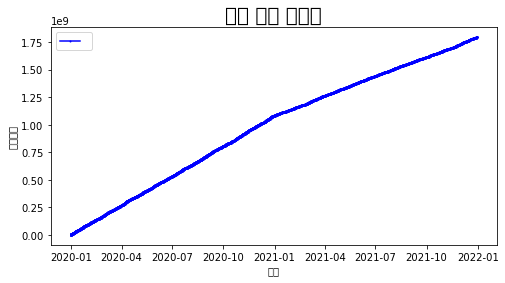

In [45]:
# 매출 증가 그래프
x = purchase.date
y = purchase.amount.cumsum()

plt.figure(figsize=(8,4))
plt.plot(x,y,color='blue',marker='o',markersize=1)
plt.title('매출 증가 그래프',size=20)
plt.xlabel('날짜',size=10)
plt.ylabel('누적매출',size=10)
plt.legend(labels=[''])


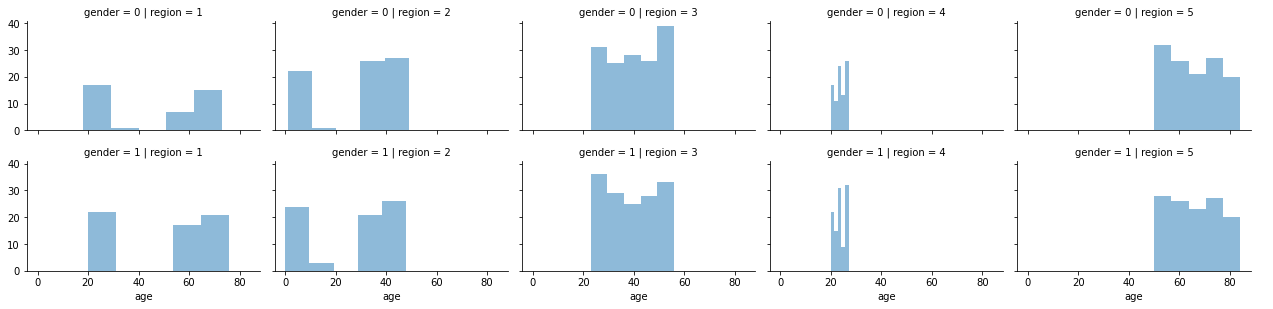

In [46]:
# 지역별 연령 분포
grid = sns.FacetGrid(customer, row='gender', col='region', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5,bins=5)
grid.add_legend()

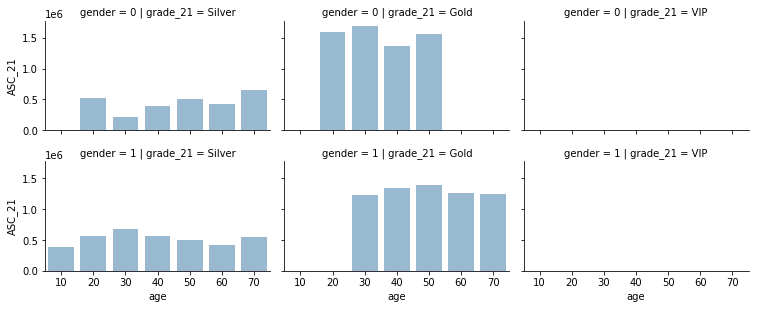

In [47]:
# 21년도 등급별 당해 매출 차이
grid = sns.FacetGrid(customer, row='gender', col='grade_21', height=2.2, aspect=1.6)

grid.map(sns.barplot, 'age', 'ASC_21', alpha=.5, ci=None, order=(10,20,30,40,50,60,70))

grid.add_legend()

In [48]:
customer.head()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,54,61526,Silver,Silver,132476.14,201843.25,7,4,927333.0,807373.0,0
1,10001,4,1,24,8709,Silver,Gold,106503.00,303332.57,8,7,852024.0,2123328.0,1
2,10002,2,0,40,94143,Silver,Gold,103675.83,413318.00,6,3,622055.0,1239954.0,1
3,10003,3,1,29,39079,Silver,Gold,175993.00,219067.83,6,6,1055958.0,1314407.0,1
4,10004,2,0,39,102429,Silver,Gold,127336.50,254242.17,8,6,1018692.0,1525453.0,1


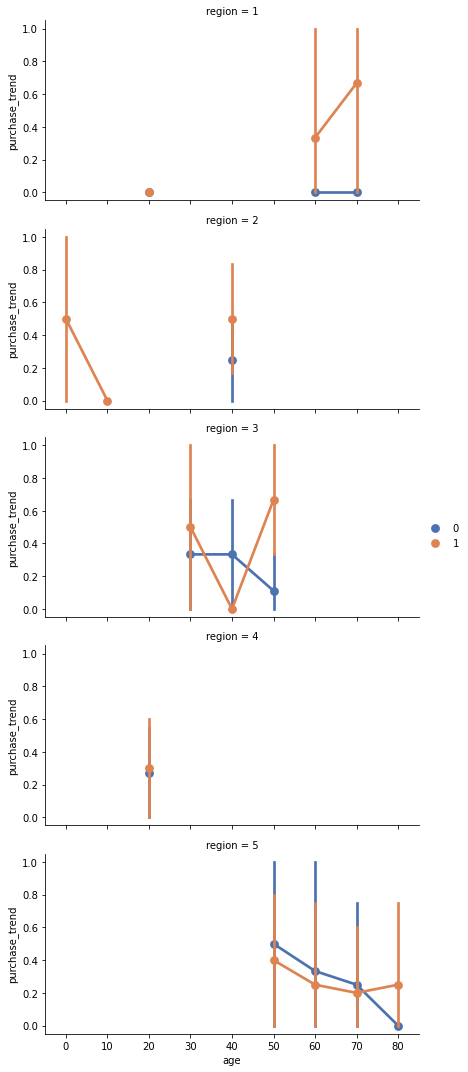

In [49]:
grid = sns.FacetGrid(customer, row='region', height=3, aspect=2)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'age', 'purchase_trend','gender', palette='deep',order=[0,10,20,30,40,50,60,70,80],hue_order=[0,1])

grid.add_legend()

In [50]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속 변수 분리
X = df_1[['gender_c', 'age_c', 'region_c', 'ARPPU_20_c',
          'AVC_20_c', 'AVC_21_c', 'amount_20_p']]
y = df_1['sales_trend']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

NameError: name 'df_1' is not defined

In [ ]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)